In [2]:
import pandas as pd
import numpy as np
keywords = pd.read_csv('keywords.csv')
meta = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings_small.csv')
# credit = pd.read_csv('credits.csv')

/home/ras007/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ratings = ratings.rename(columns={'movieId':'id'})
#Convert IDs to numeric from string
meta = meta[meta.status=="Released"]
meta = meta[meta.revenue!=0]
meta = meta[meta.budget!=0]
meta.id = pd.to_numeric(meta.id,errors="coerce")
meta = meta.dropna(subset=["id"])
meta.release_date=pd.to_datetime(meta.release_date, format = '%Y-%m-%d', errors="coerce")
meta = meta.dropna(subset=["release_date"])
meta = meta.drop_duplicates(subset=['id'])
meta = meta.drop(['homepage','poster_path','production_countries','video','spoken_languages','original_title'], axis =1)
keywords = keywords[keywords.keywords!="[]"]
keywords = keywords.drop_duplicates(subset=['id'])
meta = pd.merge(meta, keywords, on='id',how='left')


print(meta.columns)


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'keywords'],
      dtype='object')


In [54]:
cor = meta.copy()
cor = meta[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
cor.revenue = np.log(cor.revenue)
for i in cor.columns:
    cor[i] = pd.to_numeric(cor[i], errors = "coerce")
cor.corr()

/home/ras007/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/ras007/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.339848,0.490718,0.215984,0.028453,0.619871
popularity,0.339848,1.000000,0.288854,0.112441,0.162447,0.497424
revenue,0.490718,0.288854,1.000000,0.221339,0.172080,0.426647
runtime,0.215984,0.112441,0.221339,1.000000,0.295924,0.211824
vote_average,0.028453,0.162447,0.172080,0.295924,1.000000,0.270474
vote_count,0.619871,0.497424,0.426647,0.211824,0.270474,1.000000


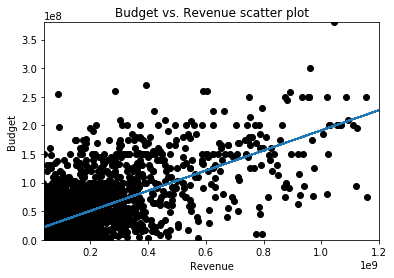

Pearson's correlation coefficient for Revenue vs. Budget:  0.729167835239


In [5]:
#Let's see the correlations first
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

meta_cpy = meta.copy()
# meta.loc[meta['vote_average']=='False', 'vote_average'] = 0

meta_cpy.revenue = pd.to_numeric(meta.revenue)
meta_cpy.budget = pd.to_numeric(meta.budget)
meta_cpy.vote_average = pd.to_numeric(meta.vote_average)
meta_cpy.runtime = pd.to_numeric(meta.runtime)
meta_cpy.popularity = pd.to_numeric(meta.popularity)


meta_cpy = meta_cpy[meta_cpy['revenue'] >=1000]
meta_cpy1 = meta_cpy[meta_cpy['budget'] >=1000]
meta_cpy2 = meta_cpy[meta_cpy['vote_average']>=0]
meta_cpy3 = meta_cpy[meta_cpy['runtime']>=0]
meta_cpy4 = meta_cpy[meta_cpy['popularity']>=0]


#Revenue vs. Budget
rev = pd.DataFrame({'revenue':[]})
bud = pd.DataFrame({'budget':[]})

rev.revenue = meta_cpy1.revenue
bud.budget = meta_cpy1.budget

rev = rev[rev.revenue >= 1000]
bud = bud[bud.budget >= 1000]

plt.plot(rev['revenue'].values,bud['budget'].values, 'o', color='black')
plt.xlim(40000000, 1200000000)
plt.ylim(1000, 380000001)

par = np.polyfit(rev['revenue'].values, bud['budget'].values, 1, full=True)
slope=par[0][0]
intercept=par[0][1]

yfit = [intercept + slope * xi for xi in rev['revenue'].values]
plt.plot(rev['revenue'].values, yfit)

plt.xlabel("Revenue")
plt.ylabel("Budget")
plt.title("Budget vs. Revenue scatter plot")

plt.show()

r,p = pearsonr(rev['revenue'].values,bud['budget'].values)

print("Pearson's correlation coefficient for Revenue vs. Budget: ",r)




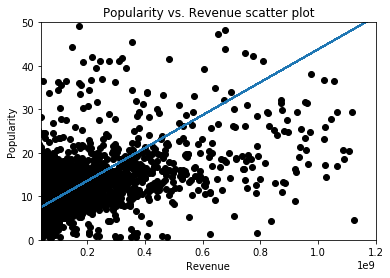

Pearson's correlation coefficient for Revenue vs. Popularity:  0.455942922283


In [6]:
#Revenue vs.Popularity
rev = pd.DataFrame({'revenue':[]})
pop = pd.DataFrame({'popularity':[]})

rev.revenue = meta_cpy4.revenue
pop.popularity = meta_cpy4.popularity

plt.plot(rev['revenue'].values,pop['popularity'].values, 'o', color='black')
plt.xlim(40000000, 1200000000)
plt.ylim(0, 50)

par = np.polyfit(rev['revenue'].values, pop['popularity'].values, 1, full=True)
slope=par[0][0]
intercept=par[0][1]

yfit = [intercept + slope * xi for xi in rev['revenue'].values]
plt.plot(rev['revenue'].values, yfit)

plt.xlabel("Revenue")
plt.ylabel("Popularity")
plt.title("Popularity vs. Revenue scatter plot")

plt.show()

r,p = pearsonr(rev['revenue'].values,pop['popularity'].values)

print("Pearson's correlation coefficient for Revenue vs. Popularity: ",r)


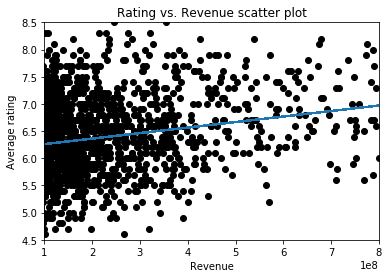

Pearson's correlation coefficient for Revenue vs. Average Rating:  0.150009519316


In [7]:
#Revenue vs. Average Rating
rev = pd.DataFrame({'revenue':[]})
vavg = pd.DataFrame({'voteavg':[]})

rev.revenue = meta_cpy2.revenue
vavg.voteavg = meta_cpy2.vote_average

plt.plot(rev['revenue'].values, vavg['voteavg'].values, 'o', color='black')
plt.xlim(100000000, 800000000)
plt.ylim(4.5, 8.5)

par = np.polyfit(rev['revenue'].values, vavg['voteavg'].values, 1, full=True)
slope=par[0][0]
intercept=par[0][1]

yfit = [intercept + slope * xi for xi in rev['revenue'].values]
plt.plot(rev['revenue'].values, yfit)

plt.xlabel("Revenue")
plt.ylabel("Average rating")
plt.title("Rating vs. Revenue scatter plot")

plt.show()
r,p = pearsonr(rev['revenue'].values,vavg['voteavg'].values)

print("Pearson's correlation coefficient for Revenue vs. Average Rating: ",r)


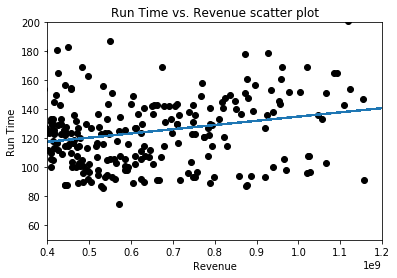

Pearson's correlation coefficient for Revenue vs. Run Time:  0.20175031818


In [8]:

#Revenue vs. Run Time
rev = pd.DataFrame({'revenue':[]})
rtime = pd.DataFrame({'runtime':[]})

rev.revenue = meta_cpy3.revenue
rtime.runtime = meta_cpy3.runtime

rev = rev[rev.revenue >= 1000]
rtime = rtime[rtime.runtime >= 0]

plt.plot(rev['revenue'].values,rtime['runtime'].values, 'o', color='black')
plt.xlim(400000000, 1200000000)
plt.ylim(50, 200)

par = np.polyfit(rev['revenue'].values, rtime['runtime'].values, 1, full=True)
slope=par[0][0]
intercept=par[0][1]

yfit = [intercept + slope * xi for xi in rev['revenue'].values]
plt.plot(rev['revenue'].values, yfit)

plt.xlabel("Revenue")
plt.ylabel("Run Time")
plt.title("Run Time vs. Revenue scatter plot")

plt.show()

r,p = pearsonr(rev['revenue'].values,rtime['runtime'].values)

print("Pearson's correlation coefficient for Revenue vs. Run Time: ",r)

In [9]:
#Let's now see ratings.csv
rats = pd.read_csv('ratings_preprocessed.csv')
ids = list(rats['id'].drop_duplicates())
rats_dict = {}
for ID in ids:
    this_df = rats.loc[rats.id == ID]
    rats_dict[ID] = this_df['rating'].mean()


In [32]:
maps = pd.read_csv('links.csv')
movId_imdb = {}

keys = list(maps.movieId)
values = list(maps.imdbId)
movId_imdb = dict(zip(keys, values))

In [45]:
new_df = pd.DataFrame({'id':[], 'rating':[], 'revenue': []})
    
new_df['id'] = list(rats_dict.keys())
new_df['rating'] = list(rats_dict.values())
for key in list(rats_dict.keys()):
    try:
        metakey = movId_imdb[key]
        metakey = str(metakey)
        while(len(metakey)!=7):
            metakey = "0" + metakey
        metakey = "tt" + metakey
        new_df.loc[new_df['id'] == key, 'revenue'] = meta.loc[meta['imdb_id']==metakey].revenue.values[0]
    except:
        pass

# new_df['id'] = meta.id
# new_df.id = pd.to_numeric(new_df.id,errors="coerce")
# new_df = new_df.dropna(subset = ['', 'column2_name', 'column3_name'])
# new_df['id'].values = [int(i) for i in new_df['id'].values]
# print(type(new_df['id'][0]))
# for index, row in new_df.iterrows():
#     print(row['id'])
#     row.rating = rats_dict[row['id']]
# print(new_df)

          id    rating      revenue     logrev
0         31  3.178571  180000000.0  19.008467
1       1029  3.702381    1600000.0  14.285514
2       1061  3.545455  165615285.0  18.925178
3       1129  3.312500   50244700.0  17.732416
4       1172  4.260870   11990401.0  16.299617
5       1263  3.864583   50000000.0  17.727534
6       1287  3.891304  146900000.0  18.805263
7       1293  3.978261   77737889.0  18.168853
8       1339  3.298077  215862692.0  19.190153
9       1343  3.743590  182300000.0  19.021164
10      1371  3.053191  139000000.0  18.749984
12      1953  4.021739   41158757.0  17.532947
13      2105  3.478723   33000000.0  17.312018
14      2150  3.513889   60000000.0  17.909855
15      2193  3.202381   57269863.0  17.863285
16      2294  3.273585  171757863.0  18.961596
17      2455  3.393617   60629159.0  17.920287
18      2968  3.569767   42365581.0  17.561847
19      3671  3.935484  119500000.0  18.598827
20        10  3.450820  352194034.0  19.679693
21        17 

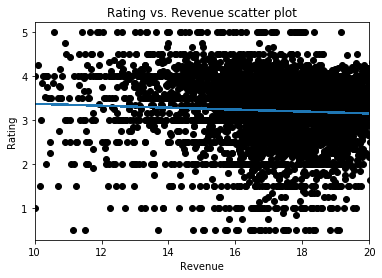

Pearson's correlation coefficient for Revenue vs. Rating:  -0.0684851442205


In [53]:
new_df = new_df.dropna(subset = ["revenue"])
new_df['logrev'] =  np.log(new_df['revenue'])
print(new_df)
#Revenue vs. rating
plt.plot(new_df['logrev'].values,new_df['rating'].values, 'o', color='black')
plt.xlim(10, 20)
# plt.ylim(50, 200)

par = np.polyfit(new_df['logrev'].values,new_df['rating'].values, 1, full=True)
slope=par[0][0]
intercept=par[0][1]

yfit = [intercept + slope * xi for xi in new_df['logrev'].values]
plt.plot(new_df['logrev'].values, yfit)

plt.xlabel("Revenue")
plt.ylabel("Rating")
plt.title("Rating vs. Revenue scatter plot")

plt.show()

r,p = pearsonr(new_df['logrev'].values,new_df['rating'].values)

print("Pearson's correlation coefficient for Revenue vs. Rating: ",r)